In [50]:
import sympy as sp
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1 Hopf Bifurcation

In the 1800s, Australia had the idea to combat the invasive rabbits $ R $ by introducing another foreign species: foxes $ F $. The following system of population growth rate of both species (kind of) shows why this was a bad idea:

$$
\dot{R} = (1 - R)R - \frac{RF}{0.3 + \alpha R}, \quad \dot{F} = -0.5F + \frac{RF}{0.3 + \alpha R}
$$

Show that the system undergoes two supercritical Hopf bifurcations at $ \alpha = 0.5 $ and $ \alpha = 1.2 $. The bifurcation point is **not** the origin. Draw a bifurcation diagram (by hand or computer). Also classify the origin’s stability.

*Hint:* It is strongly recommended to use a symbolic computing library (for example `sympy`, for Python or Julia). No calculations by hand are required for this exercise. If you do not manage, please write your ideas down anyways.


In [ ]:
# Define symbols
R, F, alpha = sp.symbols('R F alpha')
dR = (1 - R) * R - (R * F) / (0.3 + alpha * R)
dF = -0.5 * F + (R * F) / (0.3 + alpha * R)

# Jacobi matrix
J = sp.Matrix([[dR.diff(R), dR.diff(F)], [dF.diff(R), dF.diff(F)]])

# Solve for equilibrium points symbolically
equilibria = sp.solve([dR, dF], (R, F))
print("Equilibrium points:")
for p in equilibria:
    sp.pprint(p)

Equilibrium points:
(0.0, 0.0)
(1.0, 0.0)
⎛ -0.3    -0.015⋅(10.0⋅α - 17.0) ⎞
⎜───────, ───────────────────────⎟
⎜α - 2.0                  2      ⎟
⎝              (0.5⋅α - 1)       ⎠


For the origin, we get the Jacobi matrix:

In [81]:
J.subs({R: 0, F: 0})

Matrix([
[1,    0],
[0, -0.5]])

Then we get two eigenvalues $1$ and $-0.5$, which means the origin is unstable.

Since the origin and the point $(1, 0)$ are not bifurcation points. We only consider the point $$\left(\frac{0.3}{2-\alpha}, \frac{0.015(17-10\alpha)}{(1-0.5\alpha)^2}\right)$$

In [ ]:
# Bifurcation point
R_star, F_star = equilibria[-1]

# Search for alpha
alpha_values = np.linspace(0.1, 1.5, 1400)
real_parts = []
for a in alpha_values:
    J_at_eq = J.subs({R: R_star.subs(alpha, a), F: F_star.subs(alpha, a), alpha: a})

    # Only consider one eigenvalue, because the real parts of two eigenvalues are equal
    eigenvalue = list(J_at_eq.eigenvals().keys())[0]  
    real_parts.append(sp.re(eigenvalue))

real_parts = np.array(real_parts)

# Find bifurcations
for i, a in enumerate(alpha_values[1: -1]):
    if real_parts[i] < 0 < real_parts[i + 1]:
        print(f"Hopf bifurcations at alpha = {a:.3f}")
    elif real_parts[i + 2] < 0 < real_parts[i + 1]:
        print(f"Hopf bifurcations at alpha = {a:.3f}")


Hopf bifurcations at alpha = 0.500
Hopf bifurcations at alpha = 1.200


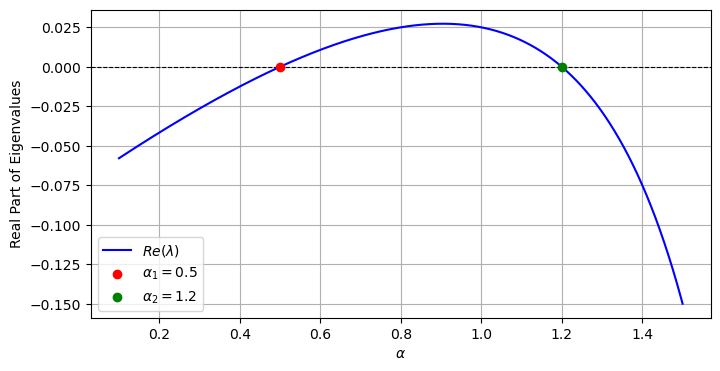

In [49]:
# Plot the real part of the eigenvalues
plt.figure(figsize=(8, 4))
plt.plot(alpha_values, real_parts, label=rf"$Re(\lambda)$", color='blue')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.scatter(0.5, 0, color='red', label=rf'$\alpha_1=0.5$', zorder=2)
plt.scatter(1.2, 0, color='green', label=rf'$\alpha_2=1.2$', zorder=2)
plt.xlabel(rf"$\alpha$")
plt.ylabel("Real Part of Eigenvalues")
plt.legend()
plt.grid()


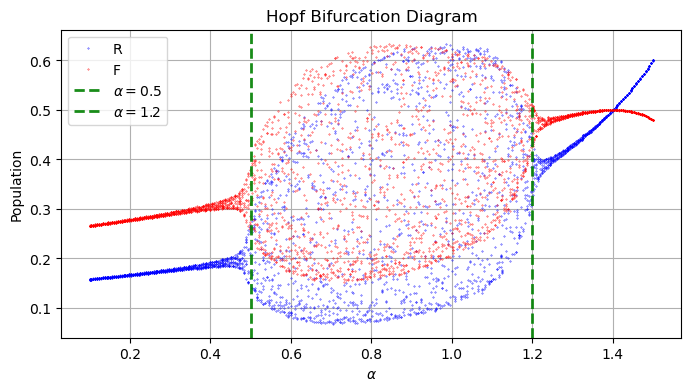

In [58]:
def hopf_system(t, state, alpha):
    R, F = state
    dRdt = (1 - R) * R - (R * F) / (0.3 + alpha * R)
    dFdt = -0.5 * F + (R * F) / (0.3 + alpha * R)
    return [dRdt, dFdt]


def simulate_hopf_bifurcation(alpha_values, initial_conditions, t_span, num_points=20000):
    t_eval = np.linspace(t_span[0], t_span[1], num_points)
    results = []
    
    for alpha in alpha_values:
        for init_cond in initial_conditions:
            sol = solve_ivp(hopf_system, t_span, init_cond, args=(alpha,), t_eval=t_eval)
            results.append((alpha, sol.y[0, -1], sol.y[1, -1]))
    return results

alpha_values = np.linspace(0.1, 1.5, 300)
initial_conditions = [np.random.rand(2) for _ in range(10)]
t_span = [0, 2000]


results = simulate_hopf_bifurcation(alpha_values, initial_conditions, t_span)
alpha_list, R_values, F_values = zip(*results)

plt.figure(figsize=(8, 4))
plt.plot(alpha_list, R_values, 'bo', label='R', markersize=.3)
plt.plot(alpha_list, F_values, 'ro', label='F', markersize=.3)
plt.axvline(0.5, c='g', linestyle='--', linewidth=2, alpha=.9, label=rf'$\alpha=0.5$')
plt.axvline(1.2, c='g', linestyle='--', linewidth=2, alpha=.9, label=rf'$\alpha=1.2$')
plt.title("Hopf Bifurcation Diagram")
plt.xlabel(rf"$\alpha$")
plt.ylabel("Population")
plt.legend()
plt.grid()

## 2. Cantor Set as a Bernoulli Process

In the lecture, we discussed the Cantor Set. You can model it through a Bernoulli process by drawing from a Bernoulli distribution with $ p = \frac{1}{2} $ and defining the following mapping:

$$
\text{if } q = 0 : x_{n+1} = \frac{x_n}{3}
$$

$$
\text{if } q = 1 : x_{n+1} = \frac{x_n + 2}{3}
$$

Simulate this mapping for an appropriate number of iterations $ N $ for different initial conditions in the interval between 0 and 1 and plot the resulting set of points. Investigate the self-similar behavior of the set by plotting different slices of the x-axis.


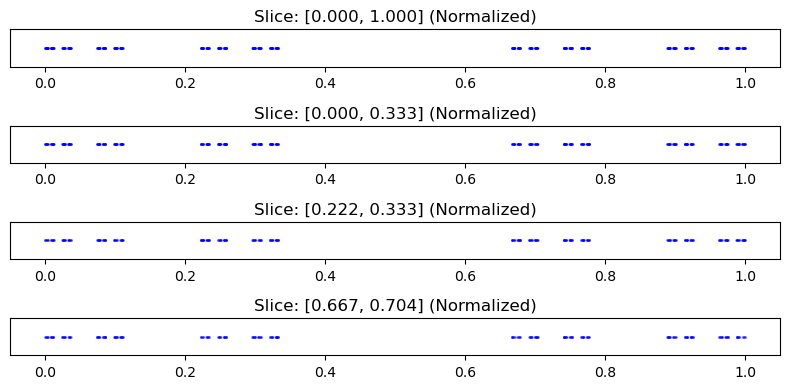

In [124]:
N = 100 
num_points = 10000
x_initial = np.linspace(0, 1, num_points)

all_points = []
for x in x_initial:
    points = [x]
    for _ in range(N):
        q = np.random.choice([0, 1])
        if q == 0:
            x = x / 3
        else:
            x = (x + 2) / 3
    all_points.append(x)
all_points = np.array(all_points)

slices = [(0,1), (0., 1/3), (1/3 - 1/9, 1/3), (2/3, 2/3 + 1/27)]

plt.figure(figsize=(8, 4))

for i, (low, high) in enumerate(slices):
    slice_points = all_points[(all_points >= low) & (all_points < high)]
    normalized_points = (slice_points - low) / (high - low)
    
    plt.subplot(len(slices), 1, i + 1)
    plt.scatter(normalized_points, [0] * len(normalized_points), s=1, color="blue", alpha=0.01*2**i)
    plt.title(f"Slice: [{low:.3f}, {high:.3f}] (Normalized)")
    plt.gca().axes.get_yaxis().set_visible(False)

plt.tight_layout()


Each slice exhibits a fractal-like structure, with sparse yet systematic clustering of points, resembling the overall distribution of the Cantor set.

## 3. Cantor Set and the Tent Map

We went on hinting at an interesting relationship between the Cantor Set and the tent map, defined by:

$$
x_{n+1} = f_\mu(x_n) =
\begin{cases} 
\mu x_n & \text{for } x_n < \frac{1}{2}, \\
\mu (1 - x_n) & \text{for } \frac{1}{2} \leq x_n
\end{cases}
$$

This mapping can be interpreted as a simple piecewise discrete-time dynamical system, which will play a crucial role in the rest of the lecture.

Generate trajectories from the tent map for $ \mu = 3 $, starting from different initial conditions. When do you observe divergent behavior? How can you make use of the results of the previous exercise to find initial states that do not lead to divergences?


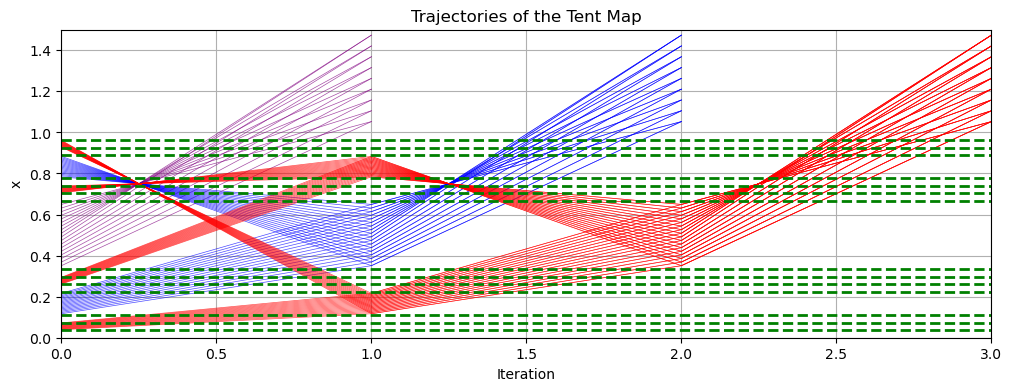

In [162]:
import numpy as np
import matplotlib.pyplot as plt

def tent_map(x):
    if x < 0.5:
        return 3 * x
    else:
        return 3 * (1 - x)

cantor_set_boundaries = [(1/3, 2/3), (1/9, 2/9), (7/9, 8/9), (1/27, 2/27), (7/27, 8/27), (19/27, 20/27), (25/27, 26/27)]
colors = ['purple', 'b', 'b', 'r', 'r', 'r', 'r']

plt.figure(figsize=(12, 4))

for interval, color in zip(cantor_set_boundaries, colors):
    initial_conditions = np.linspace(interval[0], interval[1], 20)[1:-1]
    for x0 in initial_conditions:
        x = x0
        trajectory = [x]
        while 0 < x < 1:
            x = tent_map(x)
            trajectory.append(x)
        plt.plot(trajectory, color=color, linewidth=0.5, alpha=0.7)

for interval in cantor_set_boundaries:
    plt.hlines(y=interval[0], xmin=0, xmax=len(cantor_set_boundaries), color='g', linewidth=2, linestyle='--')
    plt.hlines(y=interval[1], xmin=0, xmax=len(cantor_set_boundaries), color='g', linewidth=2, linestyle='--')

plt.xlabel('Iteration')
plt.ylabel('x')
plt.title('Trajectories of the Tent Map')
plt.xlim(0, 3)
plt.ylim(0, 1.5)
plt.grid()

plt.show()


Set the Cantor set $K = \bigcap_{n=0}^\infty K_n$, where $K_0 = [0, 1]$, $K_{n+1} = \frac{K_n}{3} \cup \left(\frac{2}{3}+\frac{K_n}{3}\right)$, $n\in\mathbb{N}$.

For any $x \not\in K$:  

- If $x \in K_0 \setminus K_1 = (\frac{1}{3}, \frac{2}{3})$, then $f(x)$ maps $x$ outside $ [0, 1] $ because:
  - $f(x) = 3x > 1$, for $x \in (\frac{1}{3}, \frac{1}{2})$,
  - $f(x) = 3(1 - x) > 1$, for $x \in (\frac{1}{2}, \frac{2}{3})$.
  Both cases lead to $f(x) > 1$, and $f(x)$ diverges.

- Assume that for some $n \geq 1$, if $x \in K_n \setminus K_{n+1}$, then $f(x) \in K_{n-1} \setminus K_n$.

Thus, ${x_n}$ will diverge with initial condition $x_0$ not in the Cantor set.
